In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [17]:
path = '/Users/pineapple/Library/CloudStorage/OneDrive-NanyangTechnologicalUniversity/S1/6407/Assignment/2/data'

In [18]:
train = pd.read_excel(os.path.join(path, 'TrainingData.xlsx'),header = None)
train.columns = ['x1','x2','x3','x4','label']
train.describe(include='all')


,x1,x2,x3,x4,label
count,120.0,120.000000,120.000000,120.0,120.000000
unique,35.0,NaN,NaN,24.0,NaN
top,6.3,NaN,NaN,0.2,NaN
freq,9.0,NaN,NaN,23.0,NaN
mean,NaN,3.052500,3.850833,NaN,2.008333
std,NaN,0.417065,2.083589,NaN,0.824986
min,NaN,2.200000,1.000000,NaN,1.000000
25%,NaN,2.800000,1.600000,NaN,1.000000
50%,NaN,3.000000,4.400000,NaN,2.000000
75%,NaN,3.300000,5.100000,NaN,3.000000


In [28]:
print("每个类别的样本量:")
class_counts = train['label'].value_counts()
print(class_counts)

# 2. 找出含有空值的样本，并查看这些样本属于哪个类别
print("\n包含空值的样本:")
missing_data_rows = train[train.isnull().any(axis=1)]  # 找出有空值的行
print(missing_data_rows)

# 按类别统计含空值样本的数量
missing_data_by_class = missing_data_rows['label'].value_counts()
print("\n每个类别中含有空值的样本量:")
print(missing_data_by_class)

# 3. 找出非数值的样本，并查看这些样本属于哪个类别
print("\n包含非数值值的样本:")
non_numeric_rows = train[~train[['x1', 'x2', 'x3', 'x4']].applymap(lambda x: isinstance(x, (int, float))).all(axis=1)]
print(non_numeric_rows)

# 按类别统计含非数值样本的数量
non_numeric_by_class = non_numeric_rows['label'].value_counts()
print("\n每个类别中含有非数值值的样本量:")
print(non_numeric_by_class)

每个类别的样本量:
3    41
1    40
2    39
Name: label, dtype: int64

包含空值的样本:
Empty DataFrame
Columns: [x1, x2, x3, x4, label]
Index: []

每个类别中含有空值的样本量:
Series([], Name: label, dtype: int64)

包含非数值值的样本:
     x1   x2   x3   x4  label
38    ?  3.3  5.7  2.5      2
60    ?  3.6  1.0  0.2      1
82  5.9  3.0  4.2    ?      3

每个类别中含有非数值值的样本量:
2    1
1    1
3    1
Name: label, dtype: int64


In [31]:
# 删除这些非数值的样本
train_cleaned = train.drop(non_numeric_rows.index).reset_index(drop=True)

# 输出清理后的数据集大小
print("清理后的数据集大小:", train_cleaned.shape)

清理后的数据集大小: (117, 5)


## 数据关系（线性/非线性）

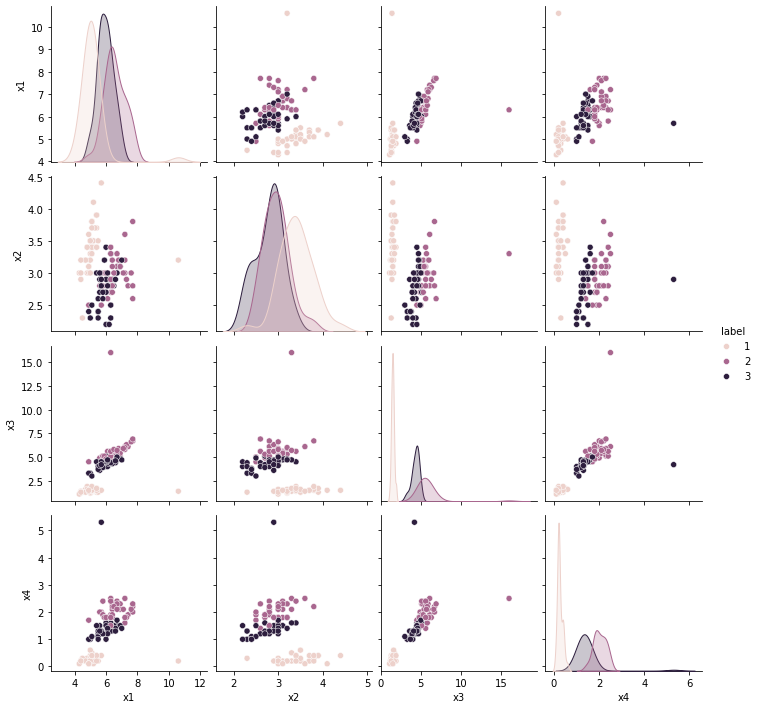

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# 使用 seaborn 绘制 pairplot
sns.pairplot(train_cleaned, hue='label')
plt.show()


In [ ]:
# 强制将数值列转换为浮点数类型
train_cleaned[['x1', 'x2', 'x3', 'x4']] = train_cleaned[['x1', 'x2', 'x3', 'x4']].astype(float)

# 检查转换后的数据类型
print(train_cleaned.dtypes)


## 异常值检测

### 整体异常值检测

In [34]:
# 定义一个函数来检测和标记异常值
def detect_outliers_iqr(df, columns):
    outliers = pd.DataFrame()
    for col in columns:
        Q1 = df[col].quantile(0.25)  # 第一四分位数
        Q3 = df[col].quantile(0.75)  # 第三四分位数
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_in_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers = pd.concat([outliers, outliers_in_col])
    return outliers.drop_duplicates()

# 检测并输出数据中的异常值
outliers = detect_outliers_iqr(train_cleaned, ['x1', 'x2', 'x3', 'x4'])
print("检测到的异常值：")
print(outliers)


检测到的异常值：
       x1   x2    x3   x4  label
92   10.6  3.2   1.4  0.2      1
51    5.2  4.1   1.5  0.1      1
94    5.7  4.4   1.5  0.4      1
87    6.3  3.3  16.0  2.5      2
113   5.7  2.9   4.2  5.3      3


In [48]:
from scipy import stats

# 使用 Z-score 检测异常值
z_scores = np.abs(stats.zscore(train_cleaned[['x1', 'x2', 'x3', 'x4']]))
outliers_z = train_cleaned[(z_scores > 3).any(axis=1)]
print("通过 Z-score 检测到的异常值：")
print(outliers_z)


通过 Z-score 检测到的异常值：
       x1   x2    x3   x4  label
87    6.3  3.3  16.0  2.5      2
92   10.6  3.2   1.4  0.2      1
94    5.7  4.4   1.5  0.4      1
113   5.7  2.9   4.2  5.3      3


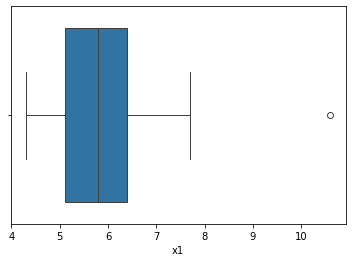

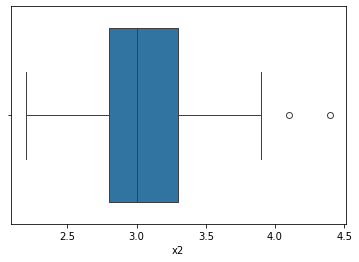

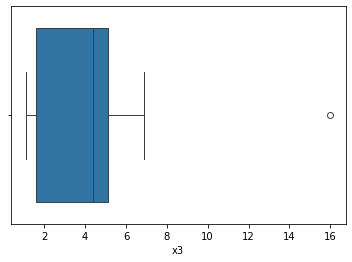

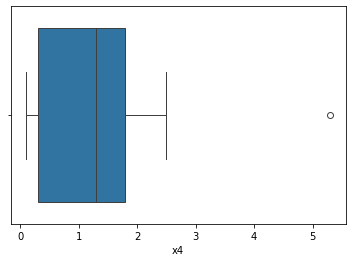

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# 绘制箱线图，查看异常值
for col in ['x1', 'x2', 'x3', 'x4']:
    sns.boxplot(data=train_cleaned, x=col)
    plt.show()


### 分类异常值检测

({2:      x1   x2    x3   x4  label
  0   7.7  3.8   6.7  2.2      2
  25  7.2  3.6   6.1  2.5      2
  87  6.3  3.3  16.0  2.5      2,
  3:       x1   x2   x3   x4  label
  76   5.1  2.5  3.0  1.1      3
  113  5.7  2.9  4.2  5.3      3,
  1:        x1   x2   x3   x4  label
  92   10.6  3.2  1.4  0.2      1
  112   4.3  3.0  1.1  0.1      1
  66    4.5  2.3  1.3  0.3      1
  94    5.7  4.4  1.5  0.4      1
  93    5.1  3.3  1.7  0.5      1
  101   5.0  3.5  1.6  0.6      1},
 {2:      x1   x2    x3   x4  label
  87  6.3  3.3  16.0  2.5      2,
  3:       x1   x2   x3   x4  label
  113  5.7  2.9  4.2  5.3      3,
  1:        x1   x2   x3   x4  label
  92   10.6  3.2  1.4  0.2      1
  101   5.0  3.5  1.6  0.6      1})

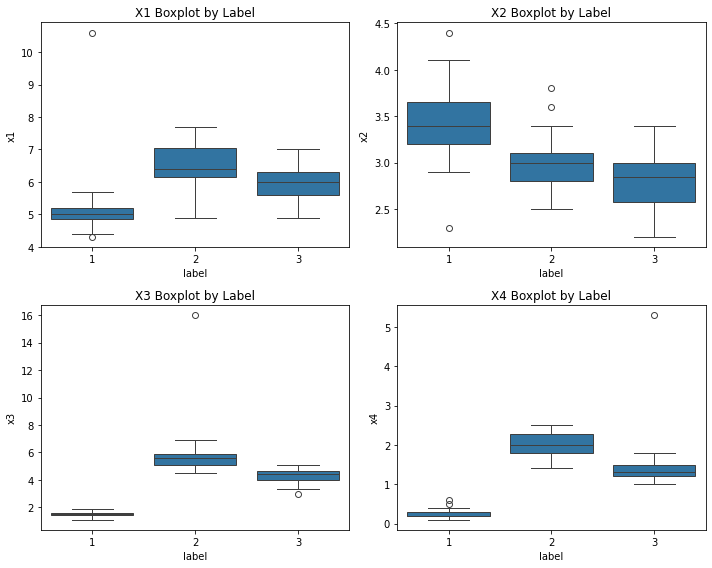

In [50]:
# 定义IQR检测异常值函数
def detect_outliers_iqr(df, columns):
    outliers = pd.DataFrame()
    for col in columns:
        Q1 = df[col].quantile(0.25)  # 第一四分位数
        Q3 = df[col].quantile(0.75)  # 第三四分位数
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_in_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers = pd.concat([outliers, outliers_in_col])
    return outliers.drop_duplicates()

# 定义Z-score检测异常值
def detect_outliers_zscore(df, columns, threshold=3):
    z_scores = np.abs(stats.zscore(df[columns]))
    outliers = df[(z_scores > threshold).any(axis=1)]
    return outliers

# 按类别检测异常值
iqr_outliers = {}
zscore_outliers = {}

for label in train_cleaned['label'].unique():
    class_data = train_cleaned[train_cleaned['label'] == label]
    
    # IQR异常值
    iqr_outliers[label] = detect_outliers_iqr(class_data, ['x1', 'x2', 'x3', 'x4'])
    
    # Z-score异常值
    zscore_outliers[label] = detect_outliers_zscore(class_data, ['x1', 'x2', 'x3', 'x4'])

# 绘制箱形图
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
sns.boxplot(data=train_cleaned, x='label', y='x1', ax=axes[0, 0])
axes[0, 0].set_title("X1 Boxplot by Label")
sns.boxplot(data=train_cleaned, x='label', y='x2', ax=axes[0, 1])
axes[0, 1].set_title("X2 Boxplot by Label")
sns.boxplot(data=train_cleaned, x='label', y='x3', ax=axes[1, 0])
axes[1, 0].set_title("X3 Boxplot by Label")
sns.boxplot(data=train_cleaned, x='label', y='x4', ax=axes[1, 1])
axes[1, 1].set_title("X4 Boxplot by Label")
plt.tight_layout()

# 输出每个类别的异常值
iqr_outliers, zscore_outliers



In [53]:
# 假设 train_cleaned 是你的数据集

# 1. 找到 x1 > 10 或 x4 > 4 的异常值
outliers_condition = (train_cleaned['x1'] > 10) | (train_cleaned['x4'] > 4)

# 2. 查找这些异常值
outliers_to_remove = train_cleaned[outliers_condition]
print("要删除的异常值：")
print(outliers_to_remove)

# 3. 从数据集中删除这些异常值
train_cleaned_no_outliers = train_cleaned[~outliers_condition].reset_index(drop=True)

# 查看清理后的数据集
print("清理后的数据集：")
print(train_cleaned_no_outliers)


要删除的异常值：
       x1   x2   x3   x4  label
92   10.6  3.2  1.4  0.2      1
113   5.7  2.9  4.2  5.3      3
清理后的数据集：
      x1   x2   x3   x4  label
0    7.7  3.8  6.7  2.2      2
1    5.0  2.3  3.3  1.0      3
2    5.0  3.4  1.6  0.4      1
3    4.9  3.1  1.5  0.2      1
4    5.4  3.9  1.3  0.4      1
..   ...  ...  ...  ...    ...
110  5.6  3.0  4.1  1.3      3
111  4.3  3.0  1.1  0.1      1
112  4.4  3.0  1.3  0.2      1
113  6.7  3.3  5.7  2.1      2
114  4.9  3.1  1.5  0.1      1

[115 rows x 5 columns]


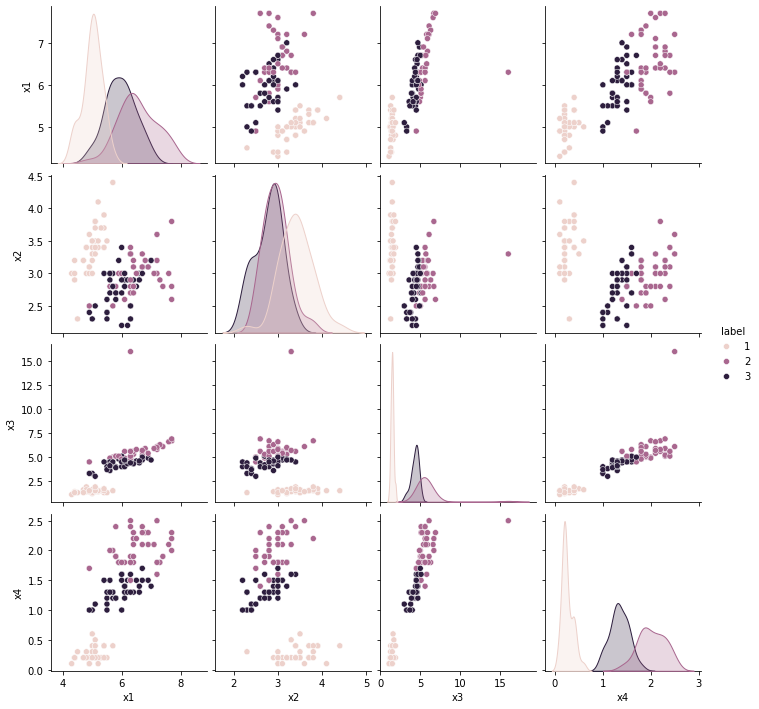

In [54]:
# 使用 seaborn 绘制 pairplot
sns.pairplot(train_cleaned_no_outliers, hue='label')
plt.show()

In [59]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 假设 train_cleaned_no_outliers 是原始数据集

# 1. 分离特征和标签
X = train_cleaned_no_outliers[['x1', 'x2', 'x3', 'x4']]  # 特征列
y = train_cleaned_no_outliers['label']  # 标签列

# 2. 对特征列进行标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. 将标准化后的特征转换为 DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=['x1', 'x2', 'x3', 'x4'])

# 4. 将标签列添加回标准化后的特征
train_scaled = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)

# 5. 查看新的 DataFrame
print(train_scaled.head())


         x1        x2        x3        x4  label
0  2.294598  1.795043  1.356614  1.316016      2
1 -1.034713 -1.776409 -0.275999 -0.277056      3
2 -1.034713  0.842656 -1.092306 -1.073592      1
3 -1.158021  0.128365 -1.140324 -1.339105      1
4 -0.541482  2.033139 -1.236360 -1.073592      1


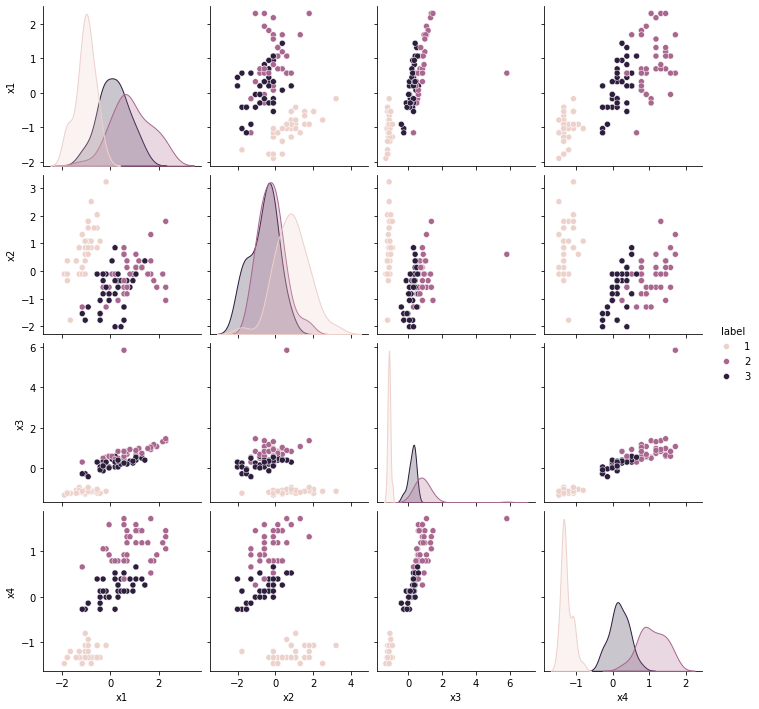

In [61]:
# 使用 seaborn 绘制 pairplot
sns.pairplot(train_scaled, hue='label')
plt.show()

### 线性核train

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [86]:
# 4. 使用线性核训练 SVM
svm_linear = SVC(kernel='linear', C = 0.9)
svm_linear.fit(X_train, y_train)

# 5. 在测试集上进行预测
y_pred = svm_linear.predict(X_val)

# 6. 评估模型
print("准确率: ", accuracy_score(y_val, y_pred))
print("\n分类报告:\n", classification_report(y_val, y_pred))


准确率:  0.9565217391304348

分类报告:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      0.90      0.95        10
           3       0.80      1.00      0.89         4

    accuracy                           0.96        23
   macro avg       0.93      0.97      0.95        23
weighted avg       0.97      0.96      0.96        23



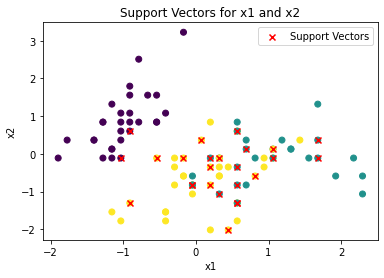

In [87]:
import matplotlib.pyplot as plt

# 获取支持向量
support_vectors = svm_linear.support_vectors_

# 可视化 x1 和 x3 特征的支持向量
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)  # 绘制 x1 和 x3 的散点图
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color='red', marker='x', label='Support Vectors')  # 标记支持向量
plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Support Vectors for x1 and x2")
plt.show()


In [97]:
test_data = pd.read_excel(os.path.join(path, 'TestData.xlsx'),header = None)

# Assign the column names explicitly as x1, x2, x3, x4
test_data.columns = ['x1', 'x2', 'x3', 'x4']

# Display the first few rows to ensure the data is correctly read
test_data.head()

# 标准化测试集数据，使用之前的标准化器（scaler）
X_test_scaled = scaler.transform(test_data)

# 使用训练好的模型进行预测
y_pred_test = svm_linear.predict(X_test_scaled)

# 输出预测结果
y_pred_test


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3])

(30,)